In [1]:
import pandas as pd

df = pd.read_csv('housepricedata.csv')
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [2]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [3]:
X = dataset[:,0:10]
Y = dataset[:,10]

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [7]:

pip install tensorflow

     |████████████████████████████████| 497.6 MB 6.4 kB/s eta 0:00:018    |██▎                             | 36.1 MB 10.6 MB/s eta 0:00:44
     |████████████████████████████████| 65 kB 767 kB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 410 kB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 164 kB/s  eta 0:00:01
     |████████████████████████████████| 2.1 MB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.1 MB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 628 kB/s  eta 0:00:01
     |████████████████████████████████| 156 kB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 

In [8]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

2022-02-15 15:30:41.671410: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-15 15:30:41.671441: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Epoch 1/100


2022-02-15 15:30:43.349296: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-15 15:30:43.349321: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-15 15:30:43.349337: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Z238-UL): /proc/driver/nvidia/version does not exist
2022-02-15 15:30:43.349504: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


32/32 [==============================] - 1s 5ms/step - loss: 0.6989 - accuracy: 0.4256 - val_loss: 0.6962 - val_accuracy: 0.4977
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4843 - val_loss: 0.6898 - val_accuracy: 0.5297
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5303 - val_loss: 0.6843 - val_accuracy: 0.5708
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.6164 - val_loss: 0.6785 - val_accuracy: 0.6712
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.7065 - val_loss: 0.6742 - val_accuracy: 0.6849
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.7280 - val_loss: 0.6703 - val_accuracy: 0.6941
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.7505 - val_loss: 0.6664 - val_accuracy: 0.7078
Epoch 8/100
32/32 [======

In [10]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2854 - accuracy: 0.8858


0.8858447670936584

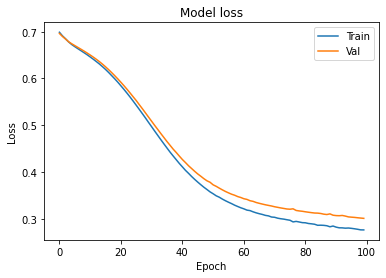

In [11]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


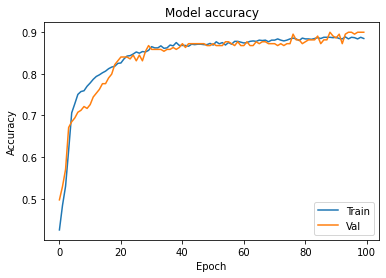

In [12]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [13]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4707 - accuracy: 0.7681 - val_loss: 0.4245 - val_accuracy: 0.8128
Epoch 2/100
32/32 [==============================] - 1s 19ms/step - loss: 0.3330 - accuracy: 0.8493 - val_loss: 0.3554 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 1s 20ms/step - loss: 0.3068 - accuracy: 0.8718 - val_loss: 0.3372 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2887 - accuracy: 0.8748 - val_loss: 0.3069 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2732 - accuracy: 0.8924 - val_loss: 0.2946 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2682 - accuracy: 0.8973 - val_loss: 0.2675 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2593 - accuracy: 0.8914 - val_loss: 0.2874 - val_accuracy: 0.8950
Epoch 

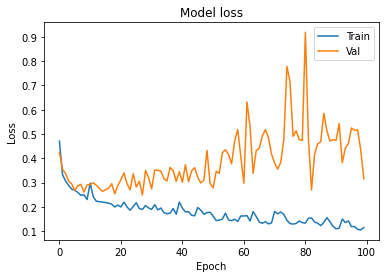

In [15]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


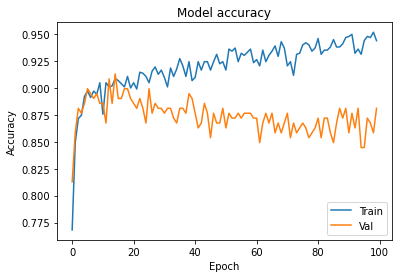

In [16]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [17]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 34ms/step - loss: 14.2543 - accuracy: 0.6409 - val_loss: 3.9032 - val_accuracy: 0.8128
Epoch 2/100
32/32 [==============================] - 1s 30ms/step - loss: 1.6917 - accuracy: 0.8346 - val_loss: 0.7209 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5920 - accuracy: 0.8532 - val_loss: 0.5316 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5270 - accuracy: 0.8650 - val_loss: 0.5235 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 32ms/step - loss: 0.5112 - accuracy: 0.8679 - val_loss: 0.4906 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4796 - accuracy: 0.8689 - val_loss: 0.5917 - val_accuracy: 0.8265
Epoch 7/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4959 - accuracy: 0.8748 - val_loss: 0.4916 - val_accuracy: 0.8539
Epoch

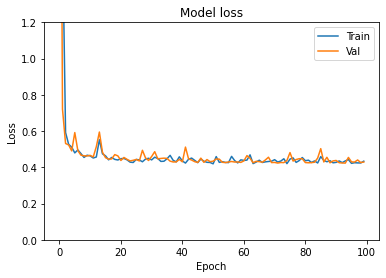

In [19]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()


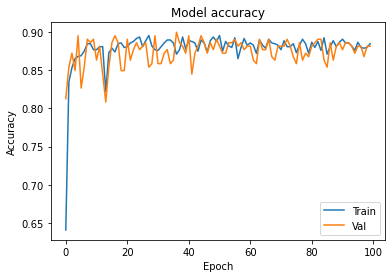

In [20]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

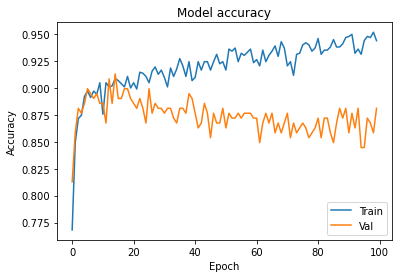

In [21]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
